<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.140805,53.623805,0.153420,90.918030,90.660993,0.257037
1,0.0,1.0,69.557305,25.246199,-0.440343,104.363161,104.744121,-0.380961
2,0.0,2.0,61.853778,43.812108,-0.025475,115.640411,115.628333,0.012079
3,0.0,3.0,66.839426,76.084252,-0.086810,152.836868,152.970605,-0.133738
4,0.0,4.0,63.936326,38.196080,-0.274301,111.858106,112.087622,-0.229517
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.463707,60.788687,-0.100311,139.152083,139.294555,-0.142472
59996,999.0,56.0,26.042119,75.883389,-0.018625,111.906884,111.927894,-0.021011
59997,999.0,57.0,99.679035,37.123148,0.365756,147.167939,146.869766,0.298173
59998,999.0,58.0,98.490129,40.577015,-0.208804,148.858340,149.134540,-0.276200


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.140805,53.623805,0.153420,90.918030,90.660993,0.257037
1,0.0,1.0,69.557305,25.246199,-0.440343,104.363161,104.744121,-0.380961
2,0.0,2.0,61.853778,43.812108,-0.025475,115.640411,115.628333,0.012079
3,0.0,3.0,66.839426,76.084252,-0.086810,152.836868,152.970605,-0.133738
4,0.0,4.0,63.936326,38.196080,-0.274301,111.858106,112.087622,-0.229517
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.463707,60.788687,-0.100311,139.152083,139.294555,-0.142472
59996,999.0,56.0,26.042119,75.883389,-0.018625,111.906884,111.927894,-0.021011
59997,999.0,57.0,99.679035,37.123148,0.365756,147.167939,146.869766,0.298173
59998,999.0,58.0,98.490129,40.577015,-0.208804,148.858340,149.134540,-0.276200


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.140805  53.623805  0.153420   90.918030   90.660993  0.257037
      1.0    69.557305  25.246199 -0.440343  104.363161  104.744121 -0.380961
      2.0    61.853778  43.812108 -0.025475  115.640411  115.628333  0.012079
      3.0    66.839426  76.084252 -0.086810  152.836868  152.970605 -0.133738
      4.0    63.936326  38.196080 -0.274301  111.858106  112.087622 -0.229517
...                ...        ...       ...         ...         ...       ...
999.0 55.0   68.463707  60.788687 -0.100311  139.152083  139.294555 -0.142472
      56.0   26.042119  75.883389 -0.018625  111.906884  111.927894 -0.021011
      57.0   99.679035  37.123148  0.365756  147.167939  146.869766  0.298173
      58.0   98.490129  40.577015 -0.208804  148.858340  149.134540 -0.276200
      59.0   77.380861  70.793656  0.142439  158.316955  158.229075  0.087880

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.140805  53.623805  0.153420   90.918030   90.660993  0.257037
      1.0    69.557305  25.246199 -0.440343  104.363161  104.744121 -0.380961
      2.0    61.853778  43.812108 -0.025475  115.640411  115.628333  0.012079
      3.0    66.839426  76.084252 -0.086810  152.836868  152.970605 -0.133738
      4.0    63.936326  38.196080 -0.274301  111.858106  112.087622 -0.229517
...                ...        ...       ...         ...         ...       ...
999.0 55.0   68.463707  60.788687 -0.100311  139.152083  139.294555 -0.142472
      56.0   26.042119  75.883389 -0.018625  111.906884  111.927894 -0.021011
      57.0   99.679035  37.123148  0.365756  147.167939  146.869766  0.298173
      58.0   98.490129  40.577015 -0.208804  148.858340  149.134540 -0.276200
      59.0   77.380861  70.793656  0.142439  158.316955  158.229075  0.087880

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.140805,53.623805,0.153420,90.918030,90.660993,0.257037
1,0.0,1.0,69.557305,25.246199,-0.440343,104.363161,104.744121,-0.380961
2,0.0,2.0,61.853778,43.812108,-0.025475,115.640411,115.628333,0.012079
3,0.0,3.0,66.839426,76.084252,-0.086810,152.836868,152.970605,-0.133738
4,0.0,4.0,63.936326,38.196080,-0.274301,111.858106,112.087622,-0.229517
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.463707,60.788687,-0.100311,139.152083,139.294555,-0.142472
59996,999.0,56.0,26.042119,75.883389,-0.018625,111.906884,111.927894,-0.021011
59997,999.0,57.0,99.679035,37.123148,0.365756,147.167939,146.869766,0.298173
59998,999.0,58.0,98.490129,40.577015,-0.208804,148.858340,149.134540,-0.276200


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.140805  53.623805  0.153420   90.918030   90.660993  0.257037
      1.0    69.557305  25.246199 -0.440343  104.363161  104.744121 -0.380961
      2.0    61.853778  43.812108 -0.025475  115.640411  115.628333  0.012079
      3.0    66.839426  76.084252 -0.086810  152.836868  152.970605 -0.133738
      4.0    63.936326  38.196080 -0.274301  111.858106  112.087622 -0.229517
...                ...        ...       ...         ...         ...       ...
999.0 55.0   68.463707  60.788687 -0.100311  139.152083  139.294555 -0.142472
      56.0   26.042119  75.883389 -0.018625  111.906884  111.927894 -0.021011
      57.0   99.679035  37.123148  0.365756  147.167939  146.869766  0.298173
      58.0   98.490129  40.577015 -0.208804  148.858340  149.134540 -0.276200
      59.0   77.380861  70.793656  0.142439  158.316955  158.229075  0.087880

[60000 rows x 6 columns]

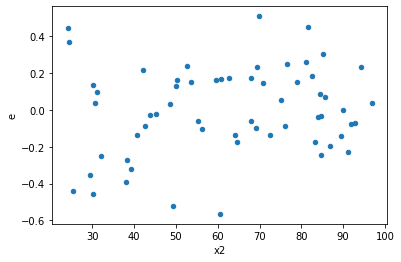

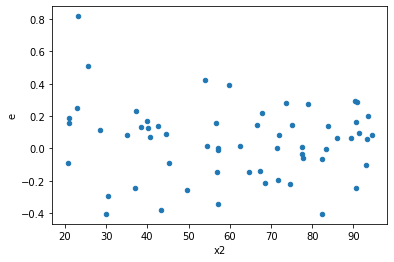

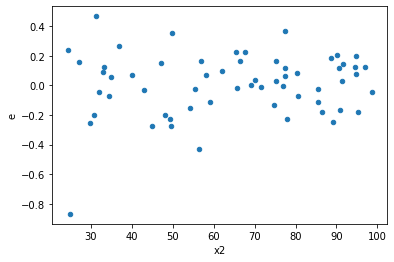

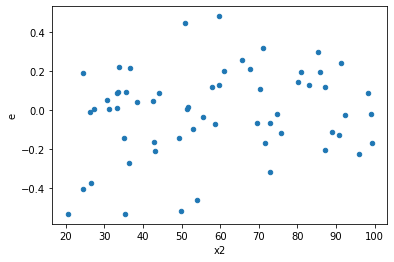

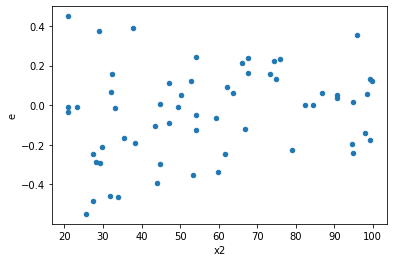

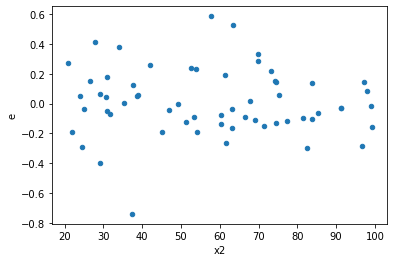

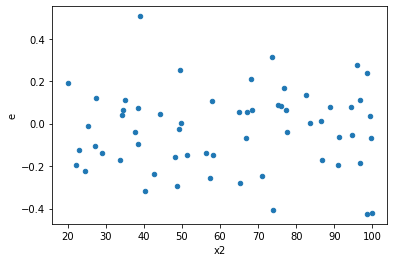

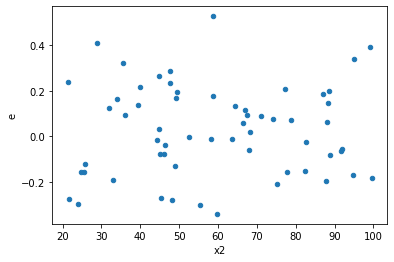

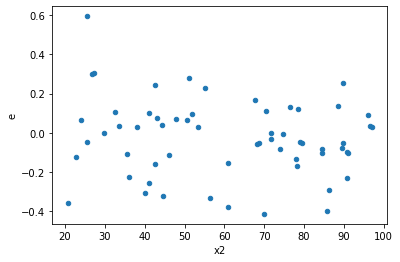

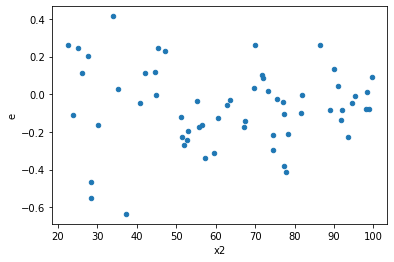

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,22.0,22.0,0.8104538075750363,0.8951465720276336,0.03683880943522892,0.04068848054671062,1.1045004214441376,0.8177671753714602,0.5911164123142699,0.4088835876857301,Reject001=1 : Homoscedasticity
43.0,22.0,22.0,0.7328020309274549,0.8014562269473888,0.03330918322397522,0.036429828497608584,1.0936872349180629,0.8355272825300082,0.5822363587349959,0.4177636412650041,Reject001=1 : Homoscedasticity
52.0,22.0,22.0,0.9747284777957566,1.0205957963522594,0.04430583989980712,0.046390718016011794,1.0470565081469938,0.9150930483933613,0.5424534758033194,0.4575465241966806,Reject001=1 : Homoscedasticity
58.0,22.0,22.0,0.7617423071626152,0.779889853610787,0.034624650325573415,0.035449538800490316,1.0238237344539374,0.9564633996509309,0.5217683001745346,0.47823169982546543,Reject001=1 : Homoscedasticity
114.0,22.0,22.0,0.9329129005212512,1.113238024971429,0.042405131841875054,0.05060172840779223,1.1932925617701544,0.6821784259159116,0.6589107870420442,0.3410892129579558,Reject001=1 : Homoscedasticity
165.0,22.0,22.0,0.6251980808726656,1.2871198590158408,0.028418094585121165,0.05850544813708367,2.0587392994221125,0.09754716834973398,0.951226415825133,0.04877358417486699,Reject001=1 : Homoscedasticity
190.0,22.0,22.0,0.8659860320511384,0.8834255333290415,0.03936300145686993,0.040155706060410974,1.0201383170541405,0.9631263479876842,0.5184368260061579,0.4815631739938421,Reject001=1 : Homoscedasticity
223.0,22.0,22.0,0.7826175150071036,0.8139656903019062,0.035573523409413804,0.036998440468268466,1.0400555503725444,0.9274427565898624,0.5362786217050688,0.4637213782949312,Reject001=1 : Homoscedasticity
246.0,22.0,22.0,0.7235794502655888,0.7455346861150399,0.03288997501207222,0.03388794027795636,1.0303425364573198,0.9447442778055615,0.5276278610972193,0.47237213890278074,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,1.4887912899403035,0.7283376243925572,0.06767233136092289,0.03310625565420715,0.48921405526342215,0.100836008850694,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,1.7422102830819493,0.7338382150433701,0.07919137650372497,0.03335628250197137,0.4212110456294742,0.04824726650992405,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,1.8418131279715275,0.5431855774927423,0.08371877854416034,0.024690253522397378,0.2949189411473993,0.005942040210561435,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,1.1995593292660156,0.6728156278477405,0.054525424057546165,0.03058252853853366,0.5608856614532121,0.1829556637836229,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,1.7674726986209797,0.5180255236540797,0.08033966811913544,0.023546614711549077,0.29308827460715764,0.0057057671011304335,Reject001=0 : Heteroscedasticity
5.0,22.0,22.0,1.3896107913326134,0.5777583486487812,0.06316412687875515,0.026261743120399143,0.4157699064028717,0.045068745563044424,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,0.8104538075750363,0.8951465720276336,0.03683880943522892,0.04068848054671062,1.1045004214441376,0.8177671753714602,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,1.0349763267412182,0.6382593306260576,0.04704437848823719,0.02901178775572989,0.6166897871333106,0.26462777014193284,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,1.1166795385741548,0.4683259225739989,0.05075816084427976,0.02128754193518177,0.41939151421363585,0.04716820701106014,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      826
Reject001=0 : Heteroscedasticity    174
Name: Result_test, dtype: int64